<div style="font-family:monospace,monaco; 
            background-color: #0A5EB0;
            padding:20px;
            color:white;
            border-radius:10px;">
    <h1>E-Commerce Analysis</h1>
</div>

<div style="font-family:monospace,monaco;">
    <h1>Import Packages</h1>
</div>

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import json

pd.set_option('display.max_columns', 50) #Maximum number of columns(e.g.,50) to display in the output
pd.set_option('display.float_format', '{:.2f}'.format) #Custom formatting for floating-point numbers.

<div style="font-family:monospace,monaco; 
            background-color: #2A3335;
            color:white;
            padding:20px;
            border-radius:10px;">
    <h1>Table of Content</h1>
</div>

<style>
    .toc-link{
        text-decoration:none;
    }
    .toc-link:hover{
        text-decoration:underline;
    }
</style>

<div style="font-family:monospace,monaco; font-size:18px;">
    0. <a href="#summary" class="toc-link">Summary</a><br>
    1. <a href="#business" class="toc-link">Business Understanding</a><br>
    2. <a href="#data" class="toc-link">Data Understanding</a><br>
    3. <a href="#prepare" class="toc-link">Data Understanding</a><br>
    4. <a href="#sql" class="toc-link">SQL EDA</a><br>
    5. <a href="#eda" class="toc-link">Expoloratory Data Analysis (EDA)</a><br>
    6. <a href="#model" class="toc-link">Modeling</a><br>
</div>

<div style="font-family:monospace,monaco; 
            background-color: #2A3335;
            color:white;
            padding:20px;
            border-radius:10px;">
    <a name="summary"></a>
    <h1>Summary</h1>
</div>

<div style="font-family:monospace,monaco; 
            background-color: #0A97B0;
            color:white;
            padding:20px;
            border-radius:10px;">
    <a name="business"></a>
    <h1>1. Business Understanding</h1>
</div>

<div style="font-family:monospace,monaco; font-size:16px;">
    <p>Supposed you are a data scientist working for a company that provides an e-commerce platform for people to buy and sell online. You are required by your manager to conduct rigorous analysis on the data that the platform has gathered so far. <strong>Your manager wants to know each and every valuable insight that you can mine from the data, so that he could have a deep understanding on what is going on in the platform and make business decisions from there.</strong> Your task is to explore and analyze the data to help your manager to make data-driven business decisions.</p>
</div>

<div style="font-family:monospace,monaco; 
            background-color: #0A97B0;
            color:white;
            padding:20px;
            border-radius:10px;">
    <a name="data"></a>
    <h1>2. Data Understanding</h1>
</div>

<div style="font-family:monospace,monaco; font-size:16px;">
    <h2>Pre-Clean Process:</h2>
    <li>The order_list column of the order data is shown in JSON format, and thus it has been cleaned by using power query to get the info from the order_list.</li>
    <li>Besides, the new_total_price and price_per_unit columns have been removed, as they are no longer needed and the total_price column will be used for this case.</li>
</div>

<div style="font-family:monospace,monaco; font-size:16px;">
    <h2>Sheet: order_data.csv</h2>
    <li><code>id</code>: the unique id for every order made</li>
    <li><code>order_status </code>: the last recorded status of the order (refer order_status.csv)</li>
    <li><code>order_list </code>: the detailed information about the order</li>
    <li><code>total_price</code>: the total price the customer needs to pay for the order</li>
    <li><code>order_paid</code>: whether a customer has paid for the order (1: paid, 0: unpaid)</li>
    <li><code>day</code>: the day in which the order was recorded</li>
    <li><code>time</code>: the time of the day in which the order was recorded</li>
    <li><code>quantity</code>(Extracted from order_list): the quantity of the order needs to pay for the order</li>
    <li><code>product_id</code>(Extracted from order_list): the unique id for every product</li>
    <li><code>product_name</code>(Extracted from order_list): the product name for every product</li>
    <li><code>unit</code>(Extracted from order_list): the unit for every product</li>
    <li><code>mode_delivery</code>(Extracted from order_list): delivery mode (value: either 1 or 2)</li>
    <li><code>merchant_id</code>(Extracted from order_list): merchant id</li>
    <li><code>productImg</code>(Extracted from order_list): the product image url for every product</li>
    <h2>Sheet: product_category.csv</h2>
    <li><code>product_id</code>: the unique id for every product</li>
    <li><code>product_category </code>: the category a product belongs to </li>
    <h2>Sheet: order_status.csv</h2>
    <li><code>order_status_id</code>: the unique id for every order status </li>
    <li><code>status</code>: the description of the status id </li>
</div>

In [13]:
order = pd.read_csv("order_clean.csv")
status = pd.read_csv("order_status.csv")
category = pd.read_csv("product_category.csv")

In [14]:
order.head()

,id,order_status,total_price,order_paid,day,time,quantity,product_id,product_name,unit,mode_delivery,merchant_id,productImg
0,33,7,16.00,0,Tue,2:55:58 PM,1,29,Almond Butter,Unit,2,26,https://prod-emeniaga.s3.ap-southeast-1.amazon...
1,40,7,160.00,0,Tue,3:11:09 PM,1,31,Kasut second hand,Unit,2,27,https://prod-emeniaga.s3.ap-southeast-1.amazon...
2,43,7,50.00,0,Tue,3:17:58 PM,1,33,Meja terpakai,Unit,1,27,https://prod-emeniaga.s3.ap-southeast-1.amazon...
3,47,4,550.00,0,Tue,3:53:37 PM,1,34,Peti ais dan coway (combo),Unit,2,29,https://prod-emeniaga.s3.ap-southeast-1.amazon...
4,49,8,6.00,0,Tue,4:04:50 PM,2,35,Jus Buah Naga,Unit,1,28,https://prod-emeniaga.s3.ap-southeast-1.amazon...


In [15]:
status.head()

,order_status_id\tstatus
0,1\tMenunggu Pengesahan Peniaga
1,2\tPesanan diterima
2,3\tPesanan ditolak
3,4\tPesanan dibatalkan
4,5\tPesanan sedang disediakan


In [16]:
category.head()

,product_id,product_category
0,25,Lain-lain
1,27,Makanan
2,28,Makanan
3,29,Makanan
4,30,Makanan


<div style="font-family:monospace,monaco; 
            background-color: #0A97B0;
            color:white;
            padding:20px;
            border-radius:10px;">
    <a name="prepare"></a>
    <h1>3. Data Preparation</h1>
</div>

In [18]:
# Splitting the column into two
status[['order_status_id', 'status']] = status['order_status_id\tstatus'].str.split('\t', expand=True)
status = status.drop(columns=["order_status_id\tstatus"])
status.tail()

,order_status_id,status
6,7,Pesanan sudah siap dan dalam perjalanan
7,8,Sahkan kod kepada pelanggan
8,9,Menunggu pengesahan kod
9,10,Menunggu bayaran
10,11,Transaksi selesai


In [19]:
# Find rows containing the '?' symbol in a 'product_name'
contains_question = order[order["product_name"].str.contains(r"\?", na=False)]
contains_question

,id,order_status,total_price,order_paid,day,time,quantity,product_id,product_name,unit,mode_delivery,merchant_id,productImg
302,394,3,13.90,0,Fri,12:32:45 PM,1,3149,Beef Classic (patty 160g) ?,Unit,1,1514,https://prod-emeniaga.s3.ap-southeast-1.amazon...
311,403,4,13.00,0,Fri,3:59:17 PM,1,3738,Peneram Panas ?,Pek,1,1786,https://prod-emeniaga.s3.ap-southeast-1.amazon...
343,435,3,28.00,0,Wed,8:08:03 PM,1,5972,DAGING HARIMAU MENANGIS Mr Kiwi ???,Pek,2,2561,https://prod-emeniaga.s3.ap-southeast-1.amazon...
469,561,4,13.00,0,Fri,4:15:15 PM,1,3738,Peneram Panas ?,Pek,1,1786,https://prod-emeniaga.s3.ap-southeast-1.amazon...
470,562,4,15.90,0,Fri,9:44:52 PM,1,3144,Cheese Burger (Beef patty 160g) ?,Unit,2,1514,https://prod-emeniaga.s3.ap-southeast-1.amazon...
487,579,10,19.00,0,Sat,2:58:46 PM,1,5039,CikMak Fish ?,Unit,2,2227,https://prod-emeniaga.s3.ap-southeast-1.amazon...
560,652,4,17.90,0,Fri,9:04:31 PM,1,3152,Smoke Streaky Beef (patty 160g) ?,Unit,2,1514,https://prod-emeniaga.s3.ap-southeast-1.amazon...


In [20]:
# Remove '?' from a specific column
order["product_name"] = order["product_name"].str.replace("?", "", regex=False)
# Filter rows with specific IDs
filtered_orders = order[order['id'].isin([394, 403, 435, 561, 562, 579, 652])]

In [21]:
filtered_orders

,id,order_status,total_price,order_paid,day,time,quantity,product_id,product_name,unit,mode_delivery,merchant_id,productImg
302,394,3,13.90,0,Fri,12:32:45 PM,1,3149,Beef Classic (patty 160g),Unit,1,1514,https://prod-emeniaga.s3.ap-southeast-1.amazon...
311,403,4,13.00,0,Fri,3:59:17 PM,1,3738,Peneram Panas,Pek,1,1786,https://prod-emeniaga.s3.ap-southeast-1.amazon...
343,435,3,28.00,0,Wed,8:08:03 PM,1,5972,DAGING HARIMAU MENANGIS Mr Kiwi,Pek,2,2561,https://prod-emeniaga.s3.ap-southeast-1.amazon...
469,561,4,13.00,0,Fri,4:15:15 PM,1,3738,Peneram Panas,Pek,1,1786,https://prod-emeniaga.s3.ap-southeast-1.amazon...
470,562,4,15.90,0,Fri,9:44:52 PM,1,3144,Cheese Burger (Beef patty 160g),Unit,2,1514,https://prod-emeniaga.s3.ap-southeast-1.amazon...
487,579,10,19.00,0,Sat,2:58:46 PM,1,5039,CikMak Fish,Unit,2,2227,https://prod-emeniaga.s3.ap-southeast-1.amazon...
560,652,4,17.90,0,Fri,9:04:31 PM,1,3152,Smoke Streaky Beef (patty 160g),Unit,2,1514,https://prod-emeniaga.s3.ap-southeast-1.amazon...


In [22]:
order.shape

(565, 13)

In [23]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             565 non-null    int64  
 1   order_status   565 non-null    int64  
 2   total_price    565 non-null    float64
 3   order_paid     565 non-null    int64  
 4   day            565 non-null    object 
 5   time           565 non-null    object 
 6   quantity       565 non-null    int64  
 7   product_id     565 non-null    int64  
 8   product_name   565 non-null    object 
 9   unit           565 non-null    object 
 10  mode_delivery  565 non-null    int64  
 11  merchant_id    565 non-null    int64  
 12  productImg     565 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 57.5+ KB


In [24]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   order_status_id  11 non-null     object
 1   status           11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


In [25]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9339 entries, 0 to 9338
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        9339 non-null   int64 
 1   product_category  9339 non-null   object
dtypes: int64(1), object(1)
memory usage: 146.1+ KB


In [26]:
# change Dtype for order_status_id into "int"
status['order_status_id'] = status['order_status_id'].astype(int)

# Merge three dataframe
order_new = pd.merge(order, status, how='left', left_on='order_status', right_on='order_status_id')
order_new.head()

,id,order_status,total_price,order_paid,day,time,quantity,product_id,product_name,unit,mode_delivery,merchant_id,productImg,order_status_id,status
0,33,7,16.00,0,Tue,2:55:58 PM,1,29,Almond Butter,Unit,2,26,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan
1,40,7,160.00,0,Tue,3:11:09 PM,1,31,Kasut second hand,Unit,2,27,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan
2,43,7,50.00,0,Tue,3:17:58 PM,1,33,Meja terpakai,Unit,1,27,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan
3,47,4,550.00,0,Tue,3:53:37 PM,1,34,Peti ais dan coway (combo),Unit,2,29,https://prod-emeniaga.s3.ap-southeast-1.amazon...,4,Pesanan dibatalkan
4,49,8,6.00,0,Tue,4:04:50 PM,2,35,Jus Buah Naga,Unit,1,28,https://prod-emeniaga.s3.ap-southeast-1.amazon...,8,Sahkan kod kepada pelanggan


In [27]:
# Check whether the dataframe is perfectly merged
order_new.isnull().sum()

id                 0
order_status       0
total_price        0
order_paid         0
day                0
time               0
quantity           0
product_id         0
product_name       0
unit               0
mode_delivery      0
merchant_id        0
productImg         0
order_status_id    0
status             0
dtype: int64

In [28]:
order_combined = pd.merge(order_new, category, on='product_id', how='left')
order_combined.head()

,id,order_status,total_price,order_paid,day,time,quantity,product_id,product_name,unit,mode_delivery,merchant_id,productImg,order_status_id,status,product_category
0,33,7,16.00,0,Tue,2:55:58 PM,1,29,Almond Butter,Unit,2,26,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan,Makanan
1,40,7,160.00,0,Tue,3:11:09 PM,1,31,Kasut second hand,Unit,2,27,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan,Pakaian
2,43,7,50.00,0,Tue,3:17:58 PM,1,33,Meja terpakai,Unit,1,27,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan,Lain-lain
3,47,4,550.00,0,Tue,3:53:37 PM,1,34,Peti ais dan coway (combo),Unit,2,29,https://prod-emeniaga.s3.ap-southeast-1.amazon...,4,Pesanan dibatalkan,Lain-lain
4,49,8,6.00,0,Tue,4:04:50 PM,2,35,Jus Buah Naga,Unit,1,28,https://prod-emeniaga.s3.ap-southeast-1.amazon...,8,Sahkan kod kepada pelanggan,Makanan


In [29]:
# Check whether the dataframe is perfectly merged
print(order_combined.shape)
order_combined.isnull().sum()

(565, 16)


id                   0
order_status         0
total_price          0
order_paid           0
day                  0
time                 0
quantity             0
product_id           0
product_name         0
unit                 0
mode_delivery        0
merchant_id          0
productImg           0
order_status_id      0
status               0
product_category    20
dtype: int64

In [30]:
order_combined[order_combined['product_category'].isna()]

,id,order_status,total_price,order_paid,day,time,quantity,product_id,product_name,unit,mode_delivery,merchant_id,productImg,order_status_id,status,product_category
67,148,11,20.00,1,Sat,12:09:44 PM,2,839,Set Dendeng + Pulut Kuning,Unit,1,412,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN
97,182,11,25.00,1,Mon,9:50:55 PM,5,1644,Ayam Goreng Kunyit Sambal Puaka,Pek,1,868,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN
112,197,11,10.00,1,Wed,10:13:31 AM,1,653,Pau segera,Unit,2,404,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN
142,227,11,25.00,1,Wed,11:37:24 PM,5,1644,Ayam Goreng Kunyit Sambal Puaka,Pek,1,868,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN
174,261,4,120.00,0,Sat,12:16:58 PM,1,3294,Haram Freshener,Unit,1,1587,https://prod-emeniaga.s3.ap-southeast-1.amazon...,4,Pesanan dibatalkan,NaN
180,267,11,40.00,1,Sat,9:12:58 PM,10,3350,Thai Omelette Rice,Pek,1,868,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN
194,283,11,25.00,1,Mon,5:48:32 PM,5,3350,Ayam Goreng Kunyit,Pek,1,868,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN
211,301,11,5.00,1,Wed,12:53:54 PM,1,3315,SET A,Pek,2,1601,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN
214,304,11,10.00,1,Wed,3:31:26 PM,1,3317,SET B,Pek,2,1601,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN
215,305,11,30.00,1,Wed,3:33:18 PM,3,3317,SET B,Pek,2,1601,https://prod-emeniaga.s3.ap-southeast-1.amazon...,11,Transaksi selesai,NaN


In [31]:
# assign the product_category as "Makanan" based on product name 
# Replace NaN with "Makanan"
order_combined['product_category'].fillna('Makanan', inplace=True)

C:\Users\lic02\AppData\Local\Temp\ipykernel_16156\2561098260.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_combined['product_category'].fillna('Makanan', inplace=True)


In [32]:
order_combined.isnull().sum()

id                  0
order_status        0
total_price         0
order_paid          0
day                 0
time                0
quantity            0
product_id          0
product_name        0
unit                0
mode_delivery       0
merchant_id         0
productImg          0
order_status_id     0
status              0
product_category    0
dtype: int64

In [33]:
#Export this dataframe into excel
# order_combined.to_csv("order_full.csv", index=False)

In [34]:
# Check for duplicate rows in the dataset
duplicate_rows = order_combined[order_combined.duplicated()]

# Count and display the duplicate rows
duplicate_count = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


<div style="font-family:monospace,monaco; 
            background-color: #0A97B0;
            color:white;
            padding:20px;
            border-radius:10px;">
    <a name="sql"></a>
    <h1>4. SQL EDA</h1>
</div>

In [36]:
#!pip install sqlite3
import sqlite3

In [37]:
# Connect to SQLite database (creates file if it doesn't exist)
conn = sqlite3.connect('order.db')
cursor = conn.cursor()

# Example: Create a table
cursor.execute("""
CREATE TABLE IF NOT EXISTS orders (
    id INTEGER PRIMARY KEY,
    order_status INTEGER,
    total_price REAL,
    order_paid INTEGER,
    day TEXT,
    time TEXT,
    quantity INTEGER,
    product_id INTEGER,
    product_name TEXT,
    unit TEXT,
    mode_delivery INTEGER,
    merchant_id INTEGER,
    productImg TEXT,
    order_status_id INTEGER,
    status TEXT,
    product_category TEXT
);
""")
conn.commit()
conn.close()

In [38]:
import pyodbc

# Load data into pandas DataFrame
data = pd.read_csv('order_full.csv')

# Connect to SQL Server
#sql_conn = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-7BI7TP9\SQLEXPRESS; DATABASE=E-commerce;')
#query = "SELECT * FROM order_full"
#data = pd.read_sql(query, sql_conn)
#sql_conn.close()

# Insert data into SQLite
sqlite_conn = sqlite3.connect('order.db')
data.to_sql('orders', sqlite_conn, if_exists='replace', index=False)
sqlite_conn.close()

<div style="font-family:monospace,monaco;">
    <h2>What are the orders with a total price greater than 100?</h2>
</div>

In [40]:
conn = sqlite3.connect('order.db')
cursor = conn.cursor()

# Execute the query
cursor.execute("SELECT * FROM orders WHERE total_price > 100;")

# Fetch all rows
rows = cursor.fetchall()

# Get the column names from the cursor description
columns = [column[0] for column in cursor.description]

# Create a DataFrame with proper column names
print(pd.DataFrame(rows, columns=columns))

conn.close()

     id  order_status  total_price  order_paid  day   time  quantity  \
0    40             7       160.00           0  Tue  15:11         1   
1    47             4       550.00           0  Tue  15:53         1   
2   100            11       160.00           1  Thu  21:46         1   
3   111            11       150.00           1  Fri  10:11         5   
4   126             3       140.00           0  Fri  16:23         1   
5   132            11       300.00           1  Fri  17:46         1   
6   133            11       140.00           1  Fri  17:46         1   
7   139            11       126.00           1  Fri  21:51         2   
8   165             8       180.00           0  Sun  15:01         1   
9   167             3       180.00           0  Sun  16:46         1   
10  212             4       108.00           0  Wed  13:41         1   
11  213             7       108.00           0  Wed  13:48         1   
12  261             4       120.00           0  Sat  12:16      

<div style="font-family:monospace,monaco;">
    <h2>Which product category has the most order and value?</h2>
</div>

In [42]:
conn = sqlite3.connect('order.db')
cursor = conn.cursor()

# Execute the query
cursor.execute("""
SELECT product_category, sum(total_price) as "Total", count(product_category) as "Order"
FROM orders 
GROUP BY product_category
ORDER BY sum(total_price) DESC, count(product_category);
""")

# Fetch all rows
rows = cursor.fetchall()

# Get the column names from the cursor description
columns = [column[0] for column in cursor.description]

# Create a DataFrame with proper column names
print(pd.DataFrame(rows, columns=columns))

conn.close()

         product_category    Total  Order
0               Lain-lain 23080.48     74
1                 Makanan 10617.40    444
2    Eletrik & Elektronik   572.00      4
3                 Pakaian   466.00     11
4            Bahan Mentah   464.50     12
5          Makanan Kering   302.00     17
6  Kecantikan & Kesihatan    54.00      2
7            Perkhidmatan     0.00      1


<div style="font-family:monospace,monaco;">
    <h2>The total and orders by mode delivery, order_paid, day</h2>
</div>

In [44]:
conn = sqlite3.connect('order.db')
cursor = conn.cursor()

# Execute the query
cursor.execute("""
WITH order_new AS (
    SELECT *, 
        CASE
            WHEN day="Mon" THEN 1
            WHEN day="Tue" THEN 2
            WHEN day="Wed" THEN 3
            WHEN day="Thu" THEN 4
            WHEN day="Fri" THEN 5
            WHEN day="Sat" THEN 6
            WHEN day="Sun" THEN 7
        END AS day_num
    FROM orders
)
SELECT mode_delivery, order_paid, day, sum(total_price) as "Total", count(order_paid) as "Order_Paid_Count"
FROM order_new
GROUP BY mode_delivery, order_paid, day
ORDER BY day_num, sum(total_price) DESC;
""")

# Fetch all rows
rows = cursor.fetchall()

# Get the column names from the cursor description
columns = [column[0] for column in cursor.description]

# Create a DataFrame with proper column names
print(pd.DataFrame(rows, columns=columns))

conn.close()

    mode_delivery  order_paid  day   Total  Order_Paid_Count
0               1           0  Mon  368.40                23
1               2           0  Mon  343.10                16
2               1           1  Mon  224.00                12
3               2           1  Mon  203.00                14
4               1           0  Tue 3758.00                21
5               2           0  Tue 2484.89                12
6               1           1  Tue  400.00                14
7               2           1  Tue  227.50                14
8               2           1  Wed 4953.80                28
9               2           0  Wed 3409.00                20
10              1           0  Wed  657.50                25
11              1           1  Wed  201.40                11
12              2           0  Thu 7881.10                21
13              1           0  Thu  867.80                29
14              1           1  Thu  520.20                15
15              2       

<div style="font-family:monospace,monaco;">
    <h2>The total and orders by period</h2>
</div>

In [121]:
conn = sqlite3.connect('order.db')
cursor = conn.cursor()

# Execute the query
cursor.execute("""
SELECT
    CASE
        WHEN CAST(SUBSTR(time, 1, 2) AS INTEGER) BETWEEN 6 AND 11 THEN 'Morning'
        WHEN CAST(SUBSTR(time, 1, 2) AS INTEGER) BETWEEN 12 AND 17 THEN 'Afternoon'
        WHEN CAST(SUBSTR(time, 1, 2) AS INTEGER) BETWEEN 18 AND 23 THEN 'Evening'
        ELSE 'Midnight'
    END AS time_period,
    COUNT(*) AS total_orders,
    SUM(total_price) AS total_price
FROM orders
GROUP BY time_period
ORDER BY
    CASE
        WHEN time_period = 'Morning' THEN 1
        WHEN time_period = 'Afternoon' THEN 2
        WHEN time_period = 'Evening' THEN 3
        ELSE 4
    END;
""")

# Fetch all rows
rows = cursor.fetchall()

# Get the column names from the cursor description
columns = [column[0] for column in cursor.description]

# Create a DataFrame with proper column names
print(pd.DataFrame(rows, columns=columns))

conn.close()

  time_period  total_orders  total_price
0     Morning           107     14876.09
1   Afternoon           244     15063.30
2     Evening           189      4962.49
3    Midnight            25       654.50


<div style="font-family:monospace,monaco; 
            background-color: #0A97B0;
            color:white;
            padding:20px;
            border-radius:10px;">
    <a name="eda"></a>
    <h1>5. EDA</h1>
</div>

In [49]:
# Get descriptive statistics for numerical columns 
order_combined.describe()

,id,order_status,total_price,order_paid,quantity,product_id,mode_delivery,merchant_id,order_status_id
count,565.00,565.00,565.00,565.00,565.00,565.00,565.00,565.00,565.00
mean,370.33,7.88,62.93,0.47,1.84,3630.30,1.48,1525.91,7.88
std,167.87,3.35,242.37,0.50,2.27,2760.00,0.50,1098.94,3.35
min,33.00,3.00,0.00,0.00,0.00,29.00,1.00,26.00,3.00
25%,226.00,4.00,10.00,0.00,1.00,956.00,1.00,489.00,4.00
50%,373.00,10.00,16.00,0.00,1.00,3317.00,1.00,1461.00,10.00
75%,515.00,11.00,32.00,1.00,2.00,5420.00,2.00,2247.00,11.00
max,656.00,11.00,3000.00,1.00,30.00,9588.00,2.00,3853.00,11.00


In [50]:
order_combined.columns

Index(['id', 'order_status', 'total_price', 'order_paid', 'day', 'time',
       'quantity', 'product_id', 'product_name', 'unit', 'mode_delivery',
       'merchant_id', 'productImg', 'order_status_id', 'status',
       'product_category'],
      dtype='object')

In [51]:
# Select categorical columns (those with dtype 'object')
# categorical_columns = data.select_dtypes('object').columns

# Select specific categorical columns
categorical_columns = ['day', 'unit', 'status', 'product_category']
                       
# Print frequency distribution for each categorical column
for col in categorical_columns:
    print(f"Frequency distribution for {col}:")
    print(order_combined[col].value_counts())
    print("\n")

Frequency distribution for day:
day
Fri    121
Thu     90
Wed     84
Sat     76
Sun     68
Mon     65
Tue     61
Name: count, dtype: int64


Frequency distribution for unit:
unit
Unit    333
Pek     214
Kg       18
Name: count, dtype: int64


Frequency distribution for status:
status
Transaksi selesai                          265
Pesanan dibatalkan                         158
Sahkan kod kepada pelanggan                 59
Pesanan ditolak                             53
Menunggu bayaran                            19
Pesanan sudah siap dan dalam perjalanan      7
Menunggu pengesahan kod                      3
Pesanan sudah siap dan boleh diambil         1
Name: count, dtype: int64


Frequency distribution for product_category:
product_category
Makanan                   444
Lain-lain                  74
Makanan Kering             17
Bahan Mentah               12
Pakaian                    11
Eletrik & Elektronik        4
Kecantikan & Kesihatan      2
Perkhidmatan                1
Name: cou

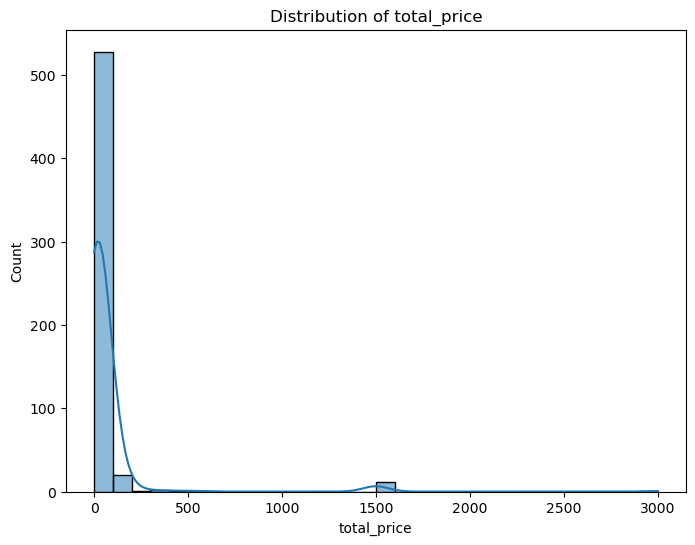

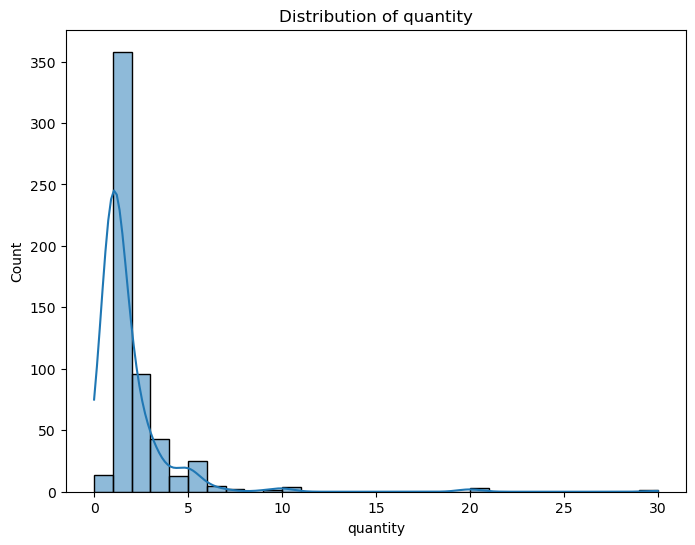

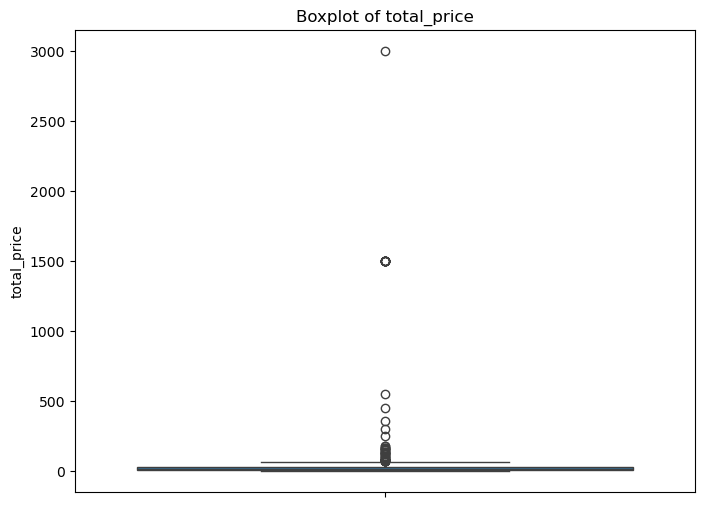

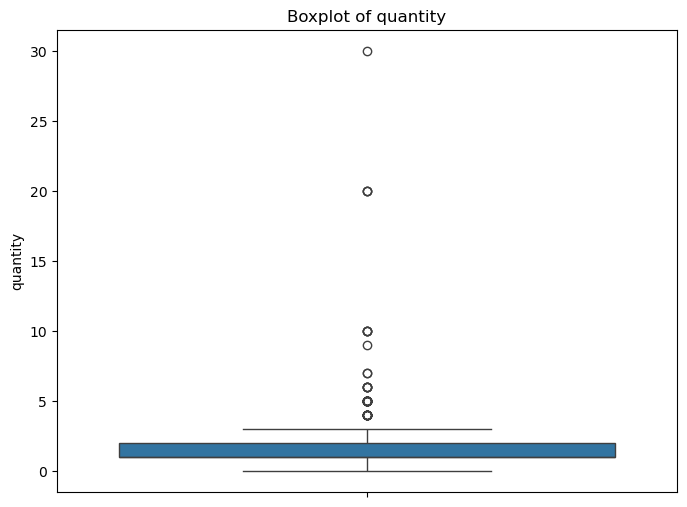

In [52]:
# Histogram for total price & quantity
# Select specific columns
numerical_columns = ['total_price', 'quantity']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(order_combined[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot for numerical columns (to detect outliers)
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(order_combined[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [53]:
# Outlier Detection for 'total_price'
col = 'total_price'

# Calculate Q1, Q3, and IQR for 'total_price'
Q1 = order_combined[col].quantile(0.25)
Q3 = order_combined[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the rows that are within the bounds (no outliers)
orders_filtered_total_price = order_combined[(order_combined[col] >= lower_bound) & (order_combined[col] <= upper_bound)]

# Identify outliers by checking if the values fall outside the bounds
outliers_total_price = order_combined[(order_combined[col] < lower_bound) | (order_combined[col] > upper_bound)]

# Print the outliers for 'total_price'
print(f"Outliers for {col}:\n{outliers_total_price}\n")

# Optional: Print the shape of the filtered and outlier DataFrames for debugging
print(f"Shape of filtered data (no outliers) for {col}: {orders_filtered_total_price.shape}")
print(f"Shape of outliers data for {col}: {outliers_total_price.shape}\n")

Outliers for total_price:
      id  order_status  total_price  order_paid  day         time  quantity  \
1     40             7       160.00           0  Tue   3:11:09 PM         1   
3     47             4       550.00           0  Tue   3:53:37 PM         1   
5     53             7        80.00           0  Tue   4:31:11 PM         5   
13    92             4        77.00           0  Thu   7:37:49 PM         1   
21   100            11       160.00           1  Thu   9:46:36 PM         1   
28   107             8        98.00           0  Fri   8:11:47 AM         1   
31   111            11       150.00           1  Fri  10:11:01 AM         5   
32   112             4        75.00           0  Fri  10:23:25 AM         5   
33   113            11        90.00           1  Fri  11:36:44 AM         1   
45   126             3       140.00           0  Fri   4:23:32 PM         1   
48   129            11        70.00           1  Fri   5:09:20 PM         4   
51   132            11    

In [54]:
# Outlier Detection for 'quantity'
col = 'quantity'

# Calculate Q1, Q3, and IQR for 'quantity'
Q1 = orders_filtered_total_price[col].quantile(0.25)
Q3 = orders_filtered_total_price[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the rows that are within the bounds (no outliers)
orders_filtered = orders_filtered_total_price[(orders_filtered_total_price[col] >= lower_bound) & (orders_filtered_total_price[col] <= upper_bound)]

# Identify outliers by checking if the values fall outside the bounds
outliers_quantity = orders_filtered_total_price[(orders_filtered_total_price[col] < lower_bound) | (orders_filtered_total_price[col] > upper_bound)]

# Print the outliers for 'quantity'
print(f"Outliers for {col}:\n{outliers_quantity}\n")

# Optional: Print the shape of the filtered and outlier DataFrames for debugging
print(f"Shape of filtered data (no outliers) for {col}: {orders_filtered.shape}")
print(f"Shape of outliers data for {col}: {outliers_quantity.shape}\n")

Outliers for quantity:
      id  order_status  total_price  order_paid  day         time  quantity  \
22   101             3        30.00           0  Fri  12:22:18 AM         5   
23   102            11        30.00           1  Fri  12:29:56 AM         5   
56   137             4        18.00           0  Fri   9:09:32 PM         4   
69   150             4        25.00           0  Sat   1:34:25 PM        10   
97   182            11        25.00           1  Mon   9:50:55 PM         5   
142  227            11        25.00           1  Wed  11:37:24 PM         5   
180  267            11        40.00           1  Sat   9:12:58 PM        10   
189  278             4        14.00           0  Mon   4:26:35 PM         4   
194  283            11        25.00           1  Mon   5:48:32 PM         5   
197  286             4        20.00           0  Mon   9:36:48 PM        20   
208  297            11        11.50           1  Tue  11:02:47 PM         5   
217  307            11       

In [55]:
numerical_columns = ['total_price', 'quantity']

# Loop through each numerical column
for col in numerical_columns:
    # Calculate Q1, Q3, and IQR for the current column
    Q1 = order_combined[col].quantile(0.25)
    Q3 = order_combined[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the rows that are within the bounds (no outliers)
    orders = order_combined[(order_combined[col] >= lower_bound) & (order_combined[col] <= upper_bound)]

    # Identify outliers by checking if the values fall outside the bounds
    outliers = order_combined[(order_combined[col] < lower_bound) | (order_combined[col] > upper_bound)]

    # Print the outliers for the current column
    print(f"Outliers for {col}:\n{outliers}\n")

    # Optional: Print the shape of the filtered and outlier DataFrames for debugging
    print(f"Shape of filtered data (no outliers) for {col}: {orders.shape}")
    print(f"Shape of outliers data for {col}: {outliers.shape}\n")

Outliers for total_price:
      id  order_status  total_price  order_paid  day         time  quantity  \
1     40             7       160.00           0  Tue   3:11:09 PM         1   
3     47             4       550.00           0  Tue   3:53:37 PM         1   
5     53             7        80.00           0  Tue   4:31:11 PM         5   
13    92             4        77.00           0  Thu   7:37:49 PM         1   
21   100            11       160.00           1  Thu   9:46:36 PM         1   
28   107             8        98.00           0  Fri   8:11:47 AM         1   
31   111            11       150.00           1  Fri  10:11:01 AM         5   
32   112             4        75.00           0  Fri  10:23:25 AM         5   
33   113            11        90.00           1  Fri  11:36:44 AM         1   
45   126             3       140.00           0  Fri   4:23:32 PM         1   
48   129            11        70.00           1  Fri   5:09:20 PM         4   
51   132            11    

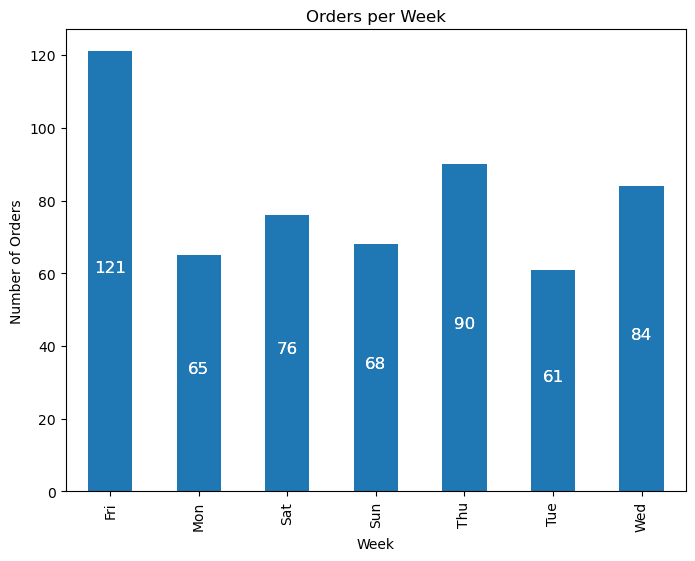

In [56]:
# Orders by day
week_orders = order_combined.groupby('day').size()

# Plot the orders by month
plt.figure(figsize=(8, 6))
week_orders.plot(kind='bar')
ax = week_orders.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, 
                  label_type='center', 
                  fontsize=12,
                  color='white',
                  padding=3)
plt.title('Orders per Week')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.show()

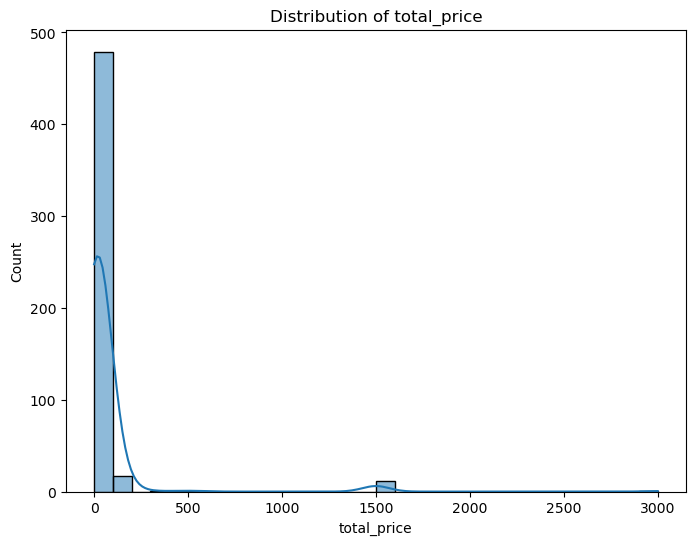

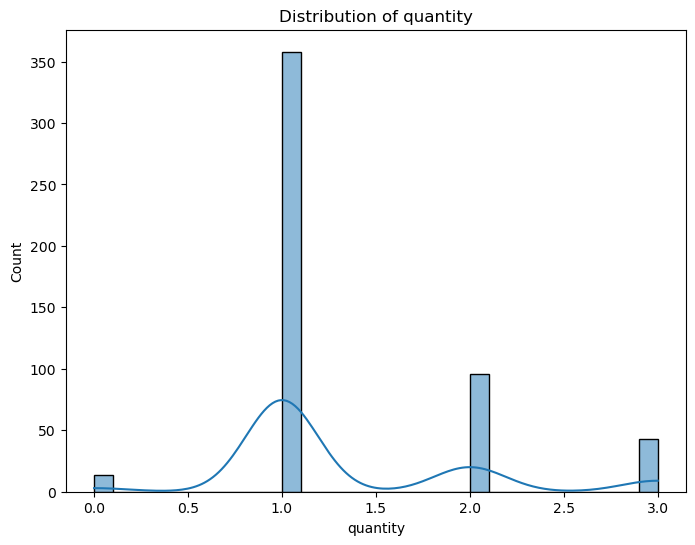

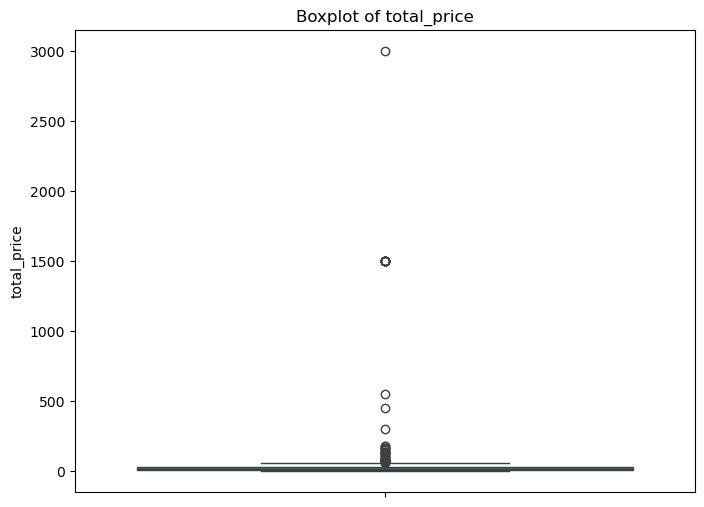

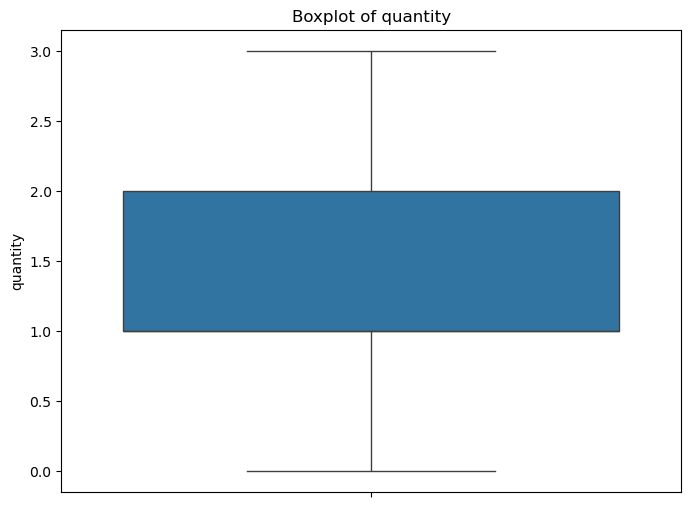

,id,order_status,total_price,order_paid,quantity,product_id,mode_delivery,merchant_id,order_status_id
count,511.00,511.00,511.00,511.00,511.00,511.00,511.00,511.00,511.00
mean,366.63,7.86,64.65,0.47,1.33,3585.22,1.50,1515.82,7.86
std,165.73,3.37,254.10,0.50,0.67,2706.91,0.50,1085.86,3.37
min,33.00,3.00,0.00,0.00,0.00,29.00,1.00,26.00,3.00
25%,222.50,4.00,9.90,0.00,1.00,949.50,1.00,488.00,4.00
50%,372.00,10.00,15.00,0.00,1.00,3317.00,2.00,1516.00,10.00
75%,508.50,11.00,30.00,1.00,2.00,5360.50,2.00,2247.00,11.00
max,656.00,11.00,3000.00,1.00,3.00,9588.00,2.00,3853.00,11.00


In [57]:
# Histogram 
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(orders[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot for numerical columns (to detect outliers)
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(orders[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

orders.describe()

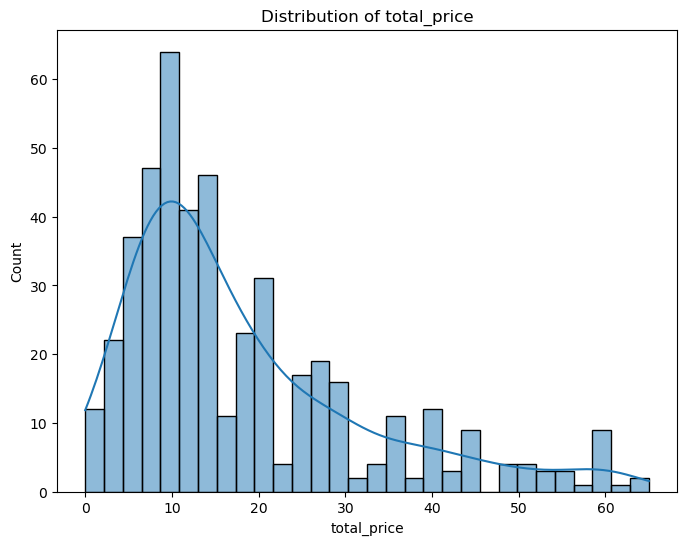

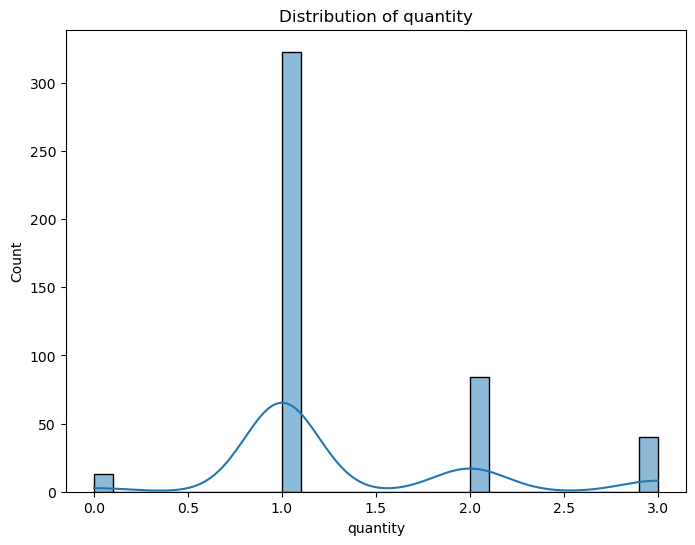

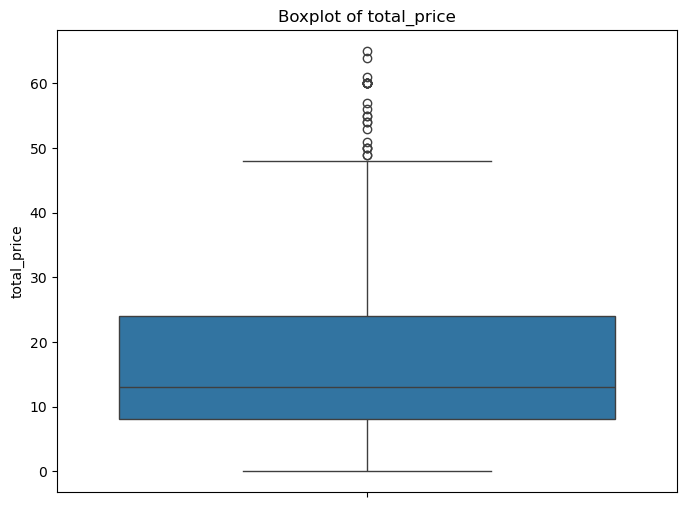

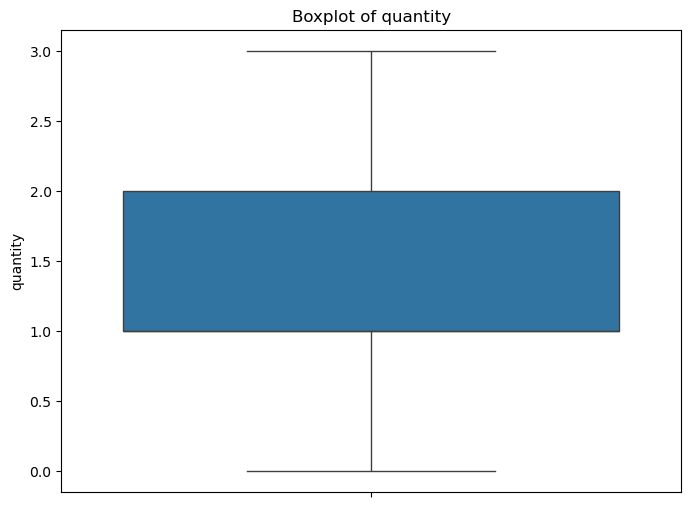

,id,order_status,total_price,order_paid,quantity,product_id,mode_delivery,merchant_id,order_status_id
count,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00
mean,366.73,7.95,18.05,0.49,1.33,3618.96,1.50,1526.77,7.95
std,162.58,3.38,13.97,0.50,0.67,2723.10,0.50,1089.23,3.38
min,33.00,3.00,0.00,0.00,0.00,29.00,1.00,26.00,3.00
25%,225.75,4.00,8.00,0.00,1.00,956.75,1.00,488.50,4.00
50%,374.50,10.00,13.00,0.00,1.00,3315.00,1.50,1514.00,10.00
75%,502.25,11.00,24.00,1.00,2.00,5440.50,2.00,2272.50,11.00
max,656.00,11.00,65.00,1.00,3.00,9588.00,2.00,3853.00,11.00


In [58]:
# Histogram 
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(orders_filtered[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot for numerical columns (to detect outliers)
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(orders_filtered[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

orders_filtered.describe()

In [59]:
# Original
order_combined['transformed_price'] = np.log(order_combined['total_price'] + 1)  # Use log(1+x) to avoid log(0)
order_combined['transformed_qty'] = np.log(order_combined['quantity'] + 1)  # Use log(1+x) to avoid log(0)
print(order_combined.shape)

# Filter outliers of total price
print(orders_filtered_total_price.shape)

# Filter outlier of total price then quantity 
print(orders_filtered.shape)

# Filter outliers of total price and quantity
print(orders.shape) 

(565, 18)
(505, 16)
(460, 16)
(511, 16)


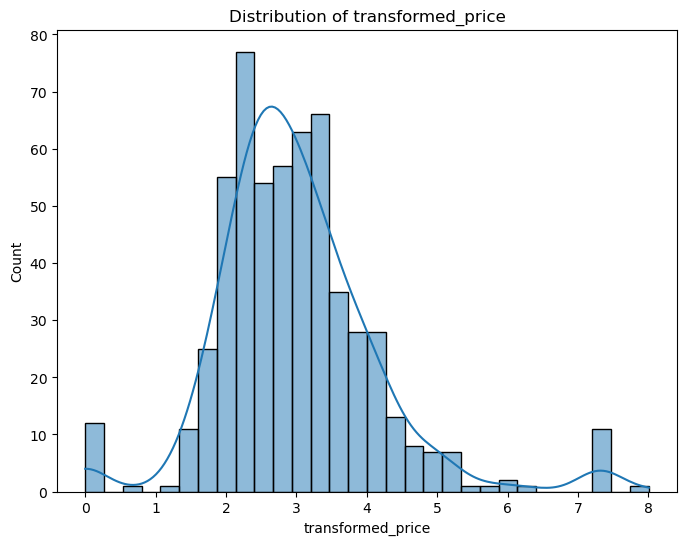

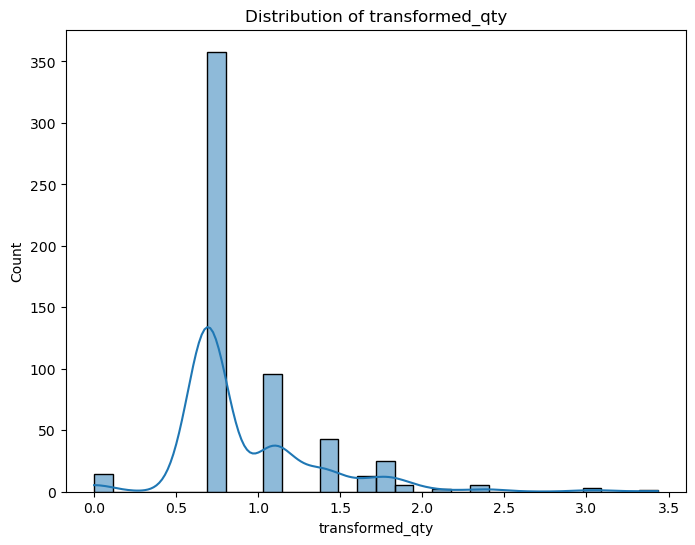

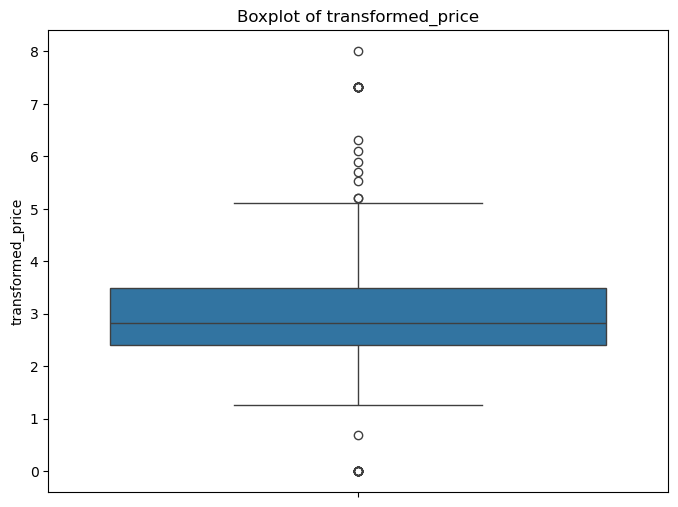

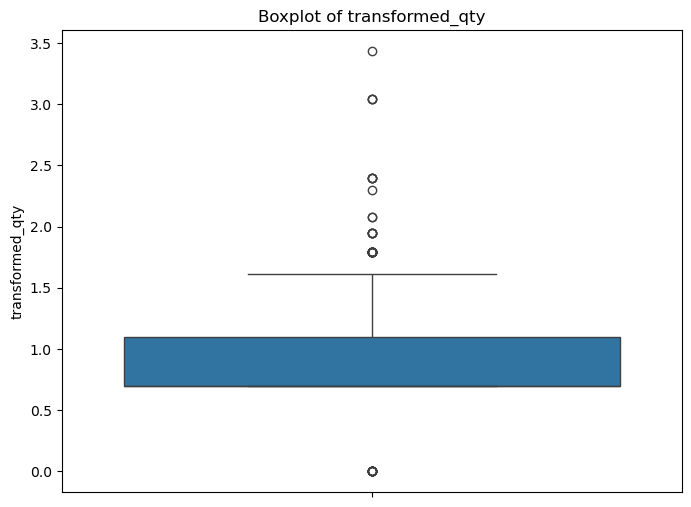

,id,order_status,total_price,order_paid,quantity,product_id,mode_delivery,merchant_id,order_status_id,transformed_price,transformed_qty
count,565.00,565.00,565.00,565.00,565.00,565.00,565.00,565.00,565.00,565.00,565.00
mean,370.33,7.88,62.93,0.47,1.84,3630.30,1.48,1525.91,7.88,3.00,0.92
std,167.87,3.35,242.37,0.50,2.27,2760.00,0.50,1098.94,3.35,1.15,0.43
min,33.00,3.00,0.00,0.00,0.00,29.00,1.00,26.00,3.00,0.00,0.00
25%,226.00,4.00,10.00,0.00,1.00,956.00,1.00,489.00,4.00,2.40,0.69
50%,373.00,10.00,16.00,0.00,1.00,3317.00,1.00,1461.00,10.00,2.83,0.69
75%,515.00,11.00,32.00,1.00,2.00,5420.00,2.00,2247.00,11.00,3.50,1.10
max,656.00,11.00,3000.00,1.00,30.00,9588.00,2.00,3853.00,11.00,8.01,3.43


In [60]:
numerical_columns2 = ['transformed_price', 'transformed_qty']

# Histogram 
for col in numerical_columns2:
    plt.figure(figsize=(8, 6))
    sns.histplot(order_combined[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot for numerical columns (to detect outliers)
for col in numerical_columns2:
    plt.figure(figsize=(8, 6))
    sns.boxplot(order_combined[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

order_combined.describe()

In [61]:
order_combined.columns

Index(['id', 'order_status', 'total_price', 'order_paid', 'day', 'time',
       'quantity', 'product_id', 'product_name', 'unit', 'mode_delivery',
       'merchant_id', 'productImg', 'order_status_id', 'status',
       'product_category', 'transformed_price', 'transformed_qty'],
      dtype='object')

In [62]:
order_combined.head()

,id,order_status,total_price,order_paid,day,time,quantity,product_id,product_name,unit,mode_delivery,merchant_id,productImg,order_status_id,status,product_category,transformed_price,transformed_qty
0,33,7,16.00,0,Tue,2:55:58 PM,1,29,Almond Butter,Unit,2,26,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan,Makanan,2.83,0.69
1,40,7,160.00,0,Tue,3:11:09 PM,1,31,Kasut second hand,Unit,2,27,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan,Pakaian,5.08,0.69
2,43,7,50.00,0,Tue,3:17:58 PM,1,33,Meja terpakai,Unit,1,27,https://prod-emeniaga.s3.ap-southeast-1.amazon...,7,Pesanan sudah siap dan dalam perjalanan,Lain-lain,3.93,0.69
3,47,4,550.00,0,Tue,3:53:37 PM,1,34,Peti ais dan coway (combo),Unit,2,29,https://prod-emeniaga.s3.ap-southeast-1.amazon...,4,Pesanan dibatalkan,Lain-lain,6.31,0.69
4,49,8,6.00,0,Tue,4:04:50 PM,2,35,Jus Buah Naga,Unit,1,28,https://prod-emeniaga.s3.ap-southeast-1.amazon...,8,Sahkan kod kepada pelanggan,Makanan,1.95,1.10


<div style="font-family:monospace,monaco; 
            background-color: #0A97B0;
            color:white;
            padding:20px;
            border-radius:10px;">
    <a name="model"></a>
    <h1>6. Modeling & Evaluation</h1>
</div>

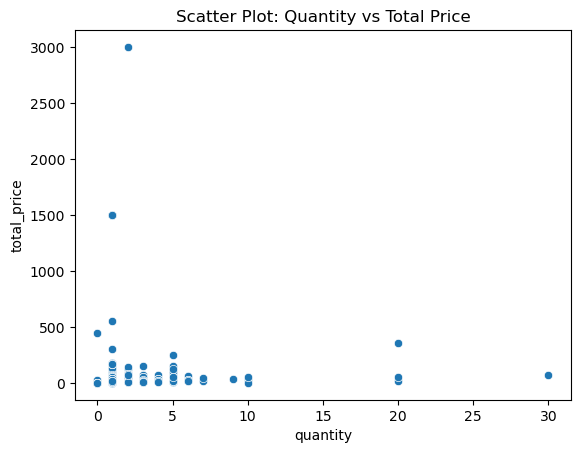

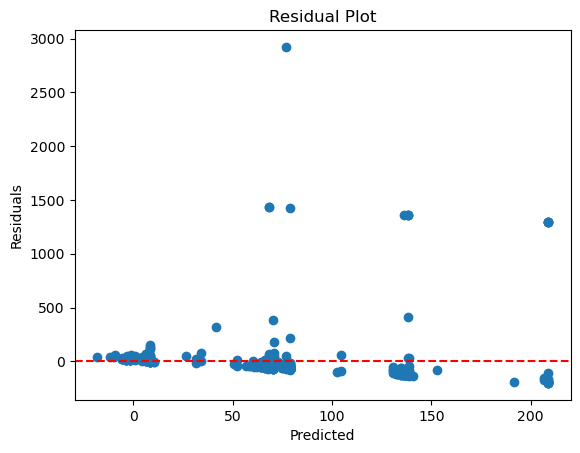

R² score for linear model: 0.03778244659398733
Relationship appears non-linear. Proceeding with Gradient Boosting.

Linear Regression Metrics: {'R²': -4.735789784519354, 'RMSE': 83.54355625673237, 'MAE': 67.59183887210952}
Gradient Boosting Metrics: {'R²': -3.946462063102997, 'RMSE': 77.58248506093602, 'MAE': 55.63035815647171}

Best Model: Gradient Boosting


In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
data = order_combined.copy()

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=['order_paid', 'order_status', 'mode_delivery'], drop_first=True)

# Define predictors and dependent variable
X = data[['quantity'] + [col for col in data.columns if 'order_paid_' in col or 'order_status_' in col or 'mode_delivery_' in col]]
y = data['total_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 1: Check for Linear Relationship ###
# Scatter plot for numerical predictor
sns.scatterplot(x='quantity', y='total_price', data=data)
plt.title('Scatter Plot: Quantity vs Total Price')
plt.show()

# Residual Analysis for linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# Check R² score as part of linearity assessment
r2_linear = r2_score(y_train, y_pred)
print(f"R² score for linear model: {r2_linear}")

### Step 2: Apply Models Based on Findings ###
# If R² > 0.7, assume linear relationship; else, use Gradient Boosting
if r2_linear > 0.7:
    print("Relationship appears linear. Proceeding with Linear Regression.")
    final_model = lr
else:
    print("Relationship appears non-linear. Proceeding with Gradient Boosting.")
    # Gradient Boosting with GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    gb = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
    grid_search.fit(X_train, y_train)
    final_model = grid_search.best_estimator_

### Step 3: Evaluate Both Models ###
# Evaluate Linear Regression
y_test_pred_linear = lr.predict(X_test)
metrics_linear = {
    'R²': r2_score(y_test, y_test_pred_linear),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_linear)),
    'MAE': mean_absolute_error(y_test, y_test_pred_linear)
}

# Evaluate Gradient Boosting
y_test_pred_gb = grid_search.best_estimator_.predict(X_test)
metrics_gb = {
    'R²': r2_score(y_test, y_test_pred_gb),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_gb)),
    'MAE': mean_absolute_error(y_test, y_test_pred_gb)
}

print("\nLinear Regression Metrics:", metrics_linear)
print("Gradient Boosting Metrics:", metrics_gb)

### Step 4: Determine Best Model ###
best_model = 'Linear Regression' if metrics_linear['R²'] > metrics_gb['R²'] else 'Gradient Boosting'
print(f"\nBest Model: {best_model}")

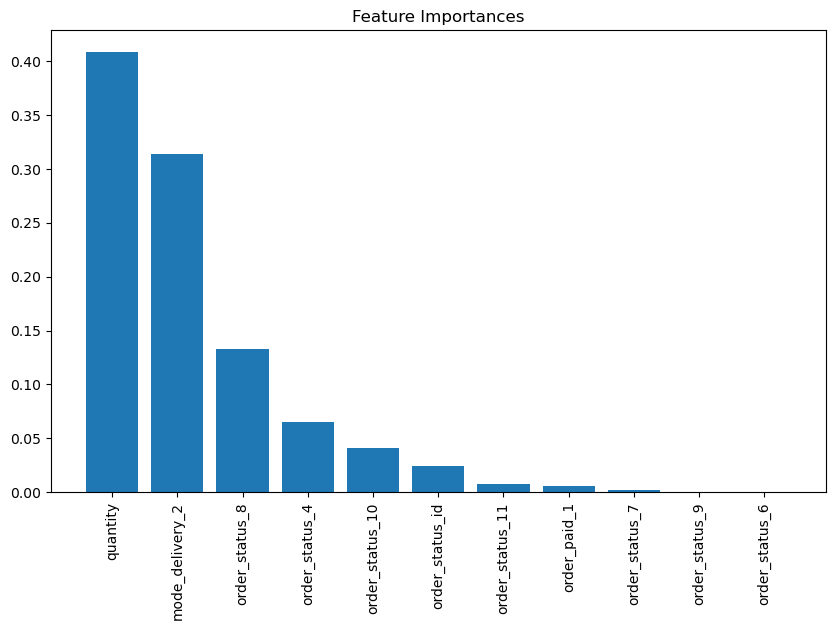

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

**Feature Importance Interpretation**

1. `Quantity:`
This feature has the highest importance score, contributing the most to predicting total_price. This makes sense as quantity directly impacts the total price (higher quantity often leads to higher total price).
It's critical to include and focus on this feature when building models.

2. `Mode Delivery_2:`
The second most important feature, indicating that the mode of delivery significantly influences total_price. This could mean that certain delivery modes correlate with larger or smaller orders.

3. `Order_Status_8:`
While less important than the top two features, this feature still has a notable contribution. It might represent a specific order status that often correlates with higher (or lower) total prices.

4. `Other Order Status Features:`
Features like order_status_4, order_status_10, etc., have diminishing importance. While they contribute to the prediction, their impact is relatively minor compared to the top features.

5. `Order_Paid_1:`
This feature has minimal importance, suggesting that the "paid status" (as encoded) does not strongly influence total_price.

6. `Negligible Features:`
Features like order_status_7, order_status_9, and order_status_6 have very low importance, indicating they contribute little to the model. They might be considered for removal to simplify the model, though their removal must be validated through testing.

In [67]:
status

,order_status_id,status
0,1,Menunggu Pengesahan Peniaga
1,2,Pesanan diterima
2,3,Pesanan ditolak
3,4,Pesanan dibatalkan
4,5,Pesanan sedang disediakan
5,6,Pesanan sudah siap dan boleh diambil
6,7,Pesanan sudah siap dan dalam perjalanan
7,8,Sahkan kod kepada pelanggan
8,9,Menunggu pengesahan kod
9,10,Menunggu bayaran
